In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
df = pd.read_csv('mtsamples.csv')

In [109]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4999 non-null   int64 
 1   description        4999 non-null   object
 2   medical_specialty  4999 non-null   object
 3   sample_name        4999 non-null   object
 4   transcription      4966 non-null   object
 5   keywords           3931 non-null   object
dtypes: int64(1), object(5)
memory usage: 234.5+ KB
None


In [110]:
df.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


Check for missing values

In [111]:
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Unnamed: 0              0
description             0
medical_specialty       0
sample_name             0
transcription          33
keywords             1068
dtype: int64


Remove missing values

In [112]:
df = df.dropna(subset=['transcription'])

In [113]:
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Unnamed: 0              0
description             0
medical_specialty       0
sample_name             0
transcription           0
keywords             1068
dtype: int64


Remove Unnecessary Columns

In [114]:
df.drop(columns=['Unnamed: 0', 'sample_name', 'keywords', 'description'], inplace=True)

In [115]:
df.head()

,medical_specialty,transcription
0,Allergy / Immunology,"SUBJECTIVE:, This 23-year-old white female pr..."
1,Bariatrics,"PAST MEDICAL HISTORY:, He has difficulty climb..."
2,Bariatrics,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ..."
3,Cardiovascular / Pulmonary,"2-D M-MODE: , ,1. Left atrial enlargement wit..."
4,Cardiovascular / Pulmonary,1. The left ventricular cavity size and wall ...


Explore the target (Medical Specialty)

In [116]:
print("\nDistribution of Target Variable:")
print(df['medical_specialty'].value_counts())


Distribution of Target Variable:
medical_specialty
Surgery                          1088
Consult - History and Phy.        516
Cardiovascular / Pulmonary        371
Orthopedic                        355
Radiology                         273
General Medicine                  259
Gastroenterology                  224
Neurology                         223
SOAP / Chart / Progress Notes     166
Urology                           156
Obstetrics / Gynecology           155
Discharge Summary                 108
ENT - Otolaryngology               96
Neurosurgery                       94
Hematology - Oncology              90
Ophthalmology                      83
Nephrology                         81
Emergency Room Reports             75
Pediatrics - Neonatal              70
Pain Management                    61
Psychiatry / Psychology            53
Office Notes                       50
Podiatry                           47
Dermatology                        29
Cosmetic / Plastic Surgery         2

C:\Users\NourH\AppData\Local\Temp\ipykernel_10072\2299392311.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='medical_specialty', order=df['medical_specialty'].value_counts().index, palette='viridis')


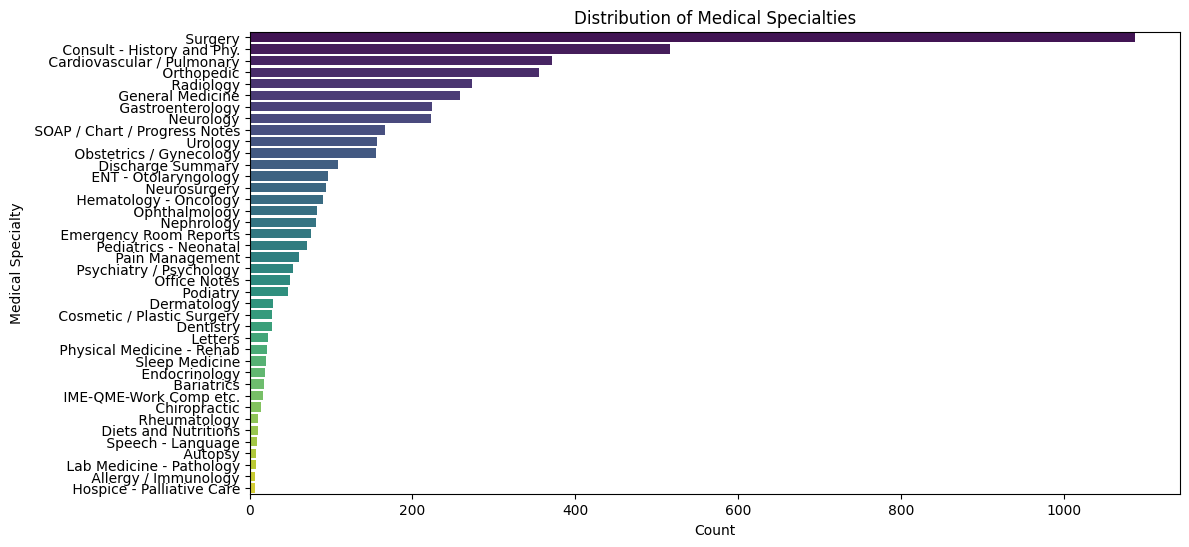

In [117]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='medical_specialty', order=df['medical_specialty'].value_counts().index, palette='viridis')
plt.title('Distribution of Medical Specialties')
plt.xlabel('Count')
plt.ylabel('Medical Specialty')
plt.show()


Explore Input Text (Transcription)

In [118]:
df['text_length'] = df['transcription'].apply(len)
print("\nText Length Statistics:")
print(df['text_length'].describe())


Text Length Statistics:
count     4966.000000
mean      3052.314337
std       1994.082239
min         11.000000
25%       1608.000000
50%       2667.000000
75%       4011.000000
max      18425.000000
Name: text_length, dtype: float64


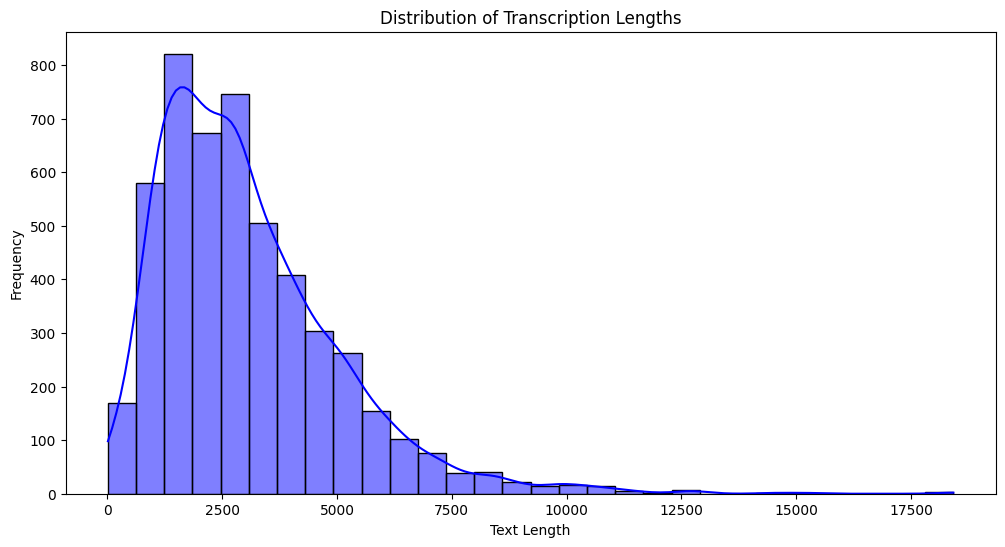

In [119]:
plt.figure(figsize=(12, 6))
sns.histplot(df['text_length'], kde=True, bins=30, color='blue')
plt.title('Distribution of Transcription Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


In [120]:
df = df.drop('text_length', axis=1)
df.head()

,medical_specialty,transcription
0,Allergy / Immunology,"SUBJECTIVE:, This 23-year-old white female pr..."
1,Bariatrics,"PAST MEDICAL HISTORY:, He has difficulty climb..."
2,Bariatrics,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ..."
3,Cardiovascular / Pulmonary,"2-D M-MODE: , ,1. Left atrial enlargement wit..."
4,Cardiovascular / Pulmonary,1. The left ventricular cavity size and wall ...


# Preprocessing the dataset

In [121]:
import re

def make_text_small(text):
    text = text.lower().strip()
    text = ' '.join(text.split())
    return text

def remove_special_chars(text):
    # Keep only letters, numbers, comma, period, dash and spaces
    return re.sub(r'[^a-zA-Z0-9\s,.\-/]', '', text)

def preprocess(text):
    text = make_text_small(text)
    text = remove_special_chars(text)
    return text

# Apply preprocessing to the dataset
df['transcription'] = df['transcription'].apply(preprocess)
df['medical_specialty'] = df['medical_specialty'].apply(preprocess)


In [122]:
df.head(10)

,medical_specialty,transcription
0,allergy / immunology,"subjective, this 23-year-old white female pres..."
1,bariatrics,"past medical history, he has difficulty climbi..."
2,bariatrics,"history of present illness , i have seen abc t..."
3,cardiovascular / pulmonary,"2-d m-mode , ,1. left atrial enlargement with ..."
4,cardiovascular / pulmonary,1. the left ventricular cavity size and wall t...
5,bariatrics,"preoperative diagnosis , morbid obesity.,posto..."
6,bariatrics,"preoperative diagnoses,1. deformity, right bre..."
7,cardiovascular / pulmonary,"2-d echocardiogram,multiple views of the heart..."
8,bariatrics,"preoperative diagnosis , lipodystrophy of the ..."
9,cardiovascular / pulmonary,"description,1. normal cardiac chambers size.,2..."


Ideas for experiments:
1. Tokenize by word
2. Tokenize by sentence
3. Keep stopwords
4. Remove stopwords
5. Tokenize with split
6. Tokenize with tokenizer
7. Stemming 1
8. Stemming 2
9. Lemmatization 1
10. Lemmatization 2
11. X
12. X
13. X
14. X
15. X

In [ ]:
X = df.drop('medical_specialty', axis=1)
y = df['medical_specialty']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
